Take in SNPxSNP graph (from Cramer's V), and build graph.

In [49]:
    ## imports
    import numpy as np
    import networkx as nx
    import scipy.stats as stats
    import pandas as pd
    import sklearn as sk
    import itertools
    import os
    from bed_reader import open_bed
    from IPython.display import SVG
    from sknetwork.embedding import LouvainNE
    from sknetwork.embedding import LouvainEmbedding
    from sknetwork.visualization import svg_graph, svg_bigraph
    from networkx.algorithms import bipartite
    from networkx.algorithms import community
    from scipy import sparse
    from sknetwork.hierarchy import LouvainHierarchy
    from sknetwork.hierarchy import cut_straight, dasgupta_score, tree_sampling_divergence
    from sknetwork.visualization import svg_graph, svg_bigraph, svg_dendrogram
    from sklearn.neighbors import NearestNeighbors
    from scipy.stats import chi2_contingency
    from scipy.sparse import diags

In [50]:
arr = np.loadtxt("chrom19cramer100.csv",
                 delimiter=",", dtype=np.float64)
arr

array([[0.        , 0.38810293, 0.24109313, ..., 0.45753968, 0.14245742,
        0.36877027],
       [0.        , 0.        , 0.22561113, ..., 0.38810293, 0.17709782,
        0.30846984],
       [0.        , 0.        , 0.        , ..., 0.24109313, 0.06528576,
        0.19743985],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.14245742,
        0.36877027],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10534386],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

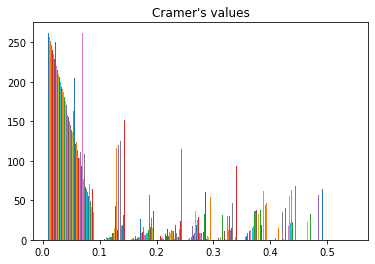

In [76]:
from matplotlib import pyplot as plt 
   
a = np.array(arr) 
plt.hist(a, bins = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]) 
plt.title("Cramer's values") 
plt.show()

In [60]:
# binarize
dfSparse = sparse.csr_matrix(arr) # convert data frame to a sparse matrix
for i in range(np.shape(dfSparse)[0]):
    for j in range(np.shape(dfSparse)[1]):
        if dfSparse[i,j] <= 0.2:
            dfSparse[i,j] = 0
        else:
            dfSparse[i,j] = 1

dfMatrix = dfSparse.toarray()
dfMatrix

array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# get triangle
triangle = np.triu(dfMatrix, k=1) # get upper half
print(triangle)
print(triangle.shape)
triangleSparse = sparse.csr_matrix(triangle)

[[0. 1. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(262, 262)


In [62]:
# create adjacency matrix 
G = nx.Graph(triangleSparse) # create graph from sparse data [UPDATE THIS]
adjacency = nx.adjacency_matrix(G) # create Adjacency matrix
adjacencyMatrix = sparse.csr_matrix(adjacency) # convert array to sparse row matrix form
print(adjacencyMatrix.shape[0])

262


In [65]:
## train classifier and build graph
louvain = LouvainNE(2)
embedding = louvain.fit_transform(adjacencyMatrix)

labels = []
for i in range(adjacencyMatrix.shape[0]):
    labels.append(i)

image = svg_graph(adjacencyMatrix, position=embedding, labels=labels, filename='graph', names=labels, display_node_weight=True, display_edge_weight=True)

#show graph
SVG(image)

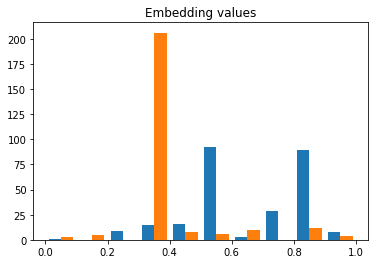

In [75]:
from matplotlib import pyplot as plt 
   
a = np.array(embedding) 
plt.hist(a, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]) 
plt.title("Embedding values") 
plt.show()